###  Import Required Libraries

In [16]:
import pandas as pd 
import matplotlib.pyplot as plt  
 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

### Create and Load Sample Dataset

In [17]:
data = {
    "Product_ID": list(range(1, 21)),
    "Category": [
        "Electronics","Clothing","Home","Electronics","Beauty","Clothing","Sports","Home","Beauty","Sports",
        "Electronics","Clothing","Home","Electronics","Beauty","Clothing","Sports","Home","Beauty","Sports"
    ],
    "Month": [
        "Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct",
        "Nov","Dec","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug"
    ],
    "Price": [
        25000,1500,7000,22000,1200,1800,3500,9500,1300,4000,
        27000,1600,7200,21000,1100,2000,3400,9000,1500,3800
    ],
    "Discount_%": [
        10,20,15,5,25,10,30,20,10,15,
        8,18,12,7,22,9,25,18,10,12
    ],
    "Ad_Spend": [
        5000,2000,3000,4500,1500,2200,2800,3200,1800,2600,
        5200,2100,3100,4400,1600,2300,2900,3100,1900,2500
    ],
    "Website_Visits": [
        8000,12000,9500,10000,7000,11000,8500,9700,7500,8900,
        8200,11500,9400,9800,7200,10800,8600,9500,7800,8800
    ],
    "Customer_Rating": [
        4.5,4.1,3.9,4.6,4.0,4.3,4.2,3.8,4.1,4.0,
        4.6,4.0,3.8,4.5,4.1,4.4,4.3,3.9,4.0,4.2
    ],
    "Season": [
        "Winter","Winter","Spring","Summer","Summer","Monsoon","Monsoon","Autumn","Autumn","Winter",
        "Winter","Winter","Spring","Summer","Summer","Monsoon","Monsoon","Autumn","Autumn","Winter"
    ],
    "Sales": [
        300,450,400,500,350,420,480,410,370,460,
        320,430,390,510,340,415,490,405,365,470
    ]
}

df = pd.DataFrame(data)
df

,Product_ID,Category,Month,Price,Discount_%,Ad_Spend,Website_Visits,Customer_Rating,Season,Sales
0,1,Electronics,Jan,25000,10,5000,8000,4.5,Winter,300
1,2,Clothing,Feb,1500,20,2000,12000,4.1,Winter,450
2,3,Home,Mar,7000,15,3000,9500,3.9,Spring,400
3,4,Electronics,Apr,22000,5,4500,10000,4.6,Summer,500
4,5,Beauty,May,1200,25,1500,7000,4.0,Summer,350
5,6,Clothing,Jun,1800,10,2200,11000,4.3,Monsoon,420
6,7,Sports,Jul,3500,30,2800,8500,4.2,Monsoon,480
7,8,Home,Aug,9500,20,3200,9700,3.8,Autumn,410
8,9,Beauty,Sep,1300,10,1800,7500,4.1,Autumn,370
9,10,Sports,Oct,4000,15,2600,8900,4.0,Winter,460


### Encode Categorical Variables

In [18]:
le = LabelEncoder()

for col in ["Category", "Month", "Season"]:
    df[col] = le.fit_transform(df[col])

### Define Features and Target Variable

In [19]:
X = df.drop(columns=["Product_ID", "Sales"])
y = df["Sales"]

### Split Dataset into Train & Test Sets

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Train Base Regression Model

In [21]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Evaluate Model with Cross-Validation

In [22]:
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [ 0.56777075  0.05980546  0.65906297 -4.80812649  0.87281173]
Mean CV Score: -0.5297351154421225


### Hyperparameter Tuning using Grid Search

In [23]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 15]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best Parameters (Grid Search):", grid_search.best_params_)


Best Parameters (Grid Search): {'max_depth': 5, 'n_estimators': 200}


### Hyperparameter Tuning using Randomized Search

In [24]:
random_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 15]
}

random_search = RandomizedSearchCV(rf, random_grid, n_iter=10, cv=5, scoring='r2', random_state=42)
random_search.fit(X_train, y_train)

print("Best Parameters (Randomized Search):", random_search.best_params_)


c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters (Randomized Search): {'n_estimators': 200, 'max_depth': 5}


### Analyze Feature Importance

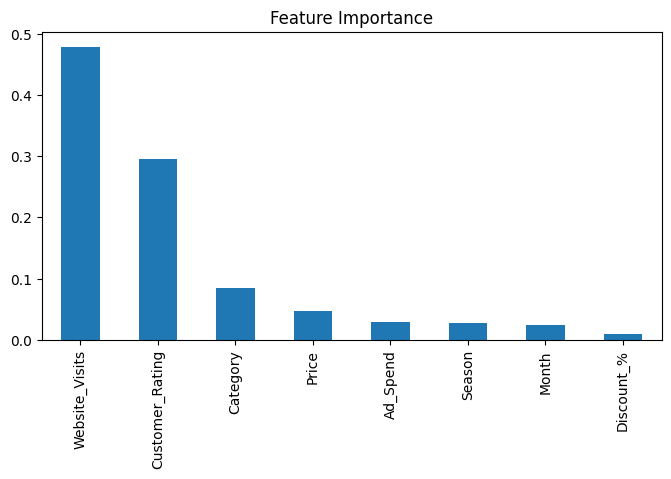

In [25]:
best_model = random_search.best_estimator_
importances = best_model.feature_importances_

feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', figsize=(8,4), title="Feature Importance")
plt.show()

### Evaluate the Final Model

In [26]:
y_pred = best_model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R² Score: 0.024377735792019517
MAE: 39.55416666666667
MSE: 2241.2211458333327
